In [41]:
from matplotlib import pyplot as plt 
%matplotlib inline
import glob
import cv2
import numpy as np
from collections import Counter

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%config InlineBackend.figure_format = 'retina'

In [3]:
dataset_path="./python/images_background/"

In [4]:
languages = [path.split("/")[-1] for path in glob.glob(dataset_path+"*")]

In [27]:
sorted(languages)

['Alphabet_of_the_Magi',
 'Anglo-Saxon_Futhorc',
 'Arcadian',
 'Armenian',
 'Asomtavruli_(Georgian)',
 'Balinese',
 'Bengali',
 'Blackfoot_(Canadian_Aboriginal_Syllabics)',
 'Braille',
 'Burmese_(Myanmar)',
 'Cyrillic',
 'Early_Aramaic',
 'Futurama',
 'Grantha',
 'Greek',
 'Gujarati',
 'Hebrew',
 'Inuktitut_(Canadian_Aboriginal_Syllabics)',
 'Japanese_(hiragana)',
 'Japanese_(katakana)',
 'Korean',
 'Latin',
 'Malay_(Jawi_-_Arabic)',
 'Mkhedruli_(Georgian)',
 'N_Ko',
 'Ojibwe_(Canadian_Aboriginal_Syllabics)',
 'Sanskrit',
 'Syriac_(Estrangelo)',
 'Tagalog',
 'Tifinagh']

In [6]:
all_alphabets = {language:[cv2.imread(image) for image in glob.glob(dataset_path+language+"/*/*")]\
                                                                       for language in languages }

In [48]:
numb_samples_per_language= {language:len(all_alphabets[language]) for language in all_alphabets.keys()}

In [67]:
np.array(list(numb_samples_per_language.values())).sum()

19280

In [7]:
from collections import Mapping, Container 
from sys import getsizeof


def deep_getsizeof(o, ids): 
    
    """
        Find the memory footprint of a Python object

        This is a recursive function that drills down a Python object graph
        like a dictionary holding nested dictionaries with lists of lists
        and tuples and sets.

        The sys.getsizeof function does a shallow size of only. It counts each
        object inside a container as pointer only regardless of how big it
        really is.

        :param o: the object
        :param ids:
    """
    d = deep_getsizeof
    if id(o) in ids:
        return 0

    r = getsizeof(o)
    ids.add(id(o))

    if isinstance(o, str) :
        return r

    if isinstance(o, Mapping):
        return r + sum(d(k, ids) + d(v, ids) for k, v in o.items())

    if isinstance(o, Container):
        return r + sum(d(x, ids) for x in o)

    return r

In [8]:
print("{:.3f}Mb of memory usage".format(deep_getsizeof(all_alphabets,set())/(1024*1024)))

610.659Mb of memory usage


In [9]:
def plot_figures(figures, nrows = 1, ncols=1,figsize=(15,15)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)

    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(figures[ind])
        axeslist.ravel()[ind].set_title(ind)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

In [10]:
def alphabet_overview(alphabet_images,figsize):
    indecies = list(range(0,len(alphabet_images),20))
    letters_in_alphabet = len(alphabet_images)/20
    nrows,ncols = (int(np.sqrt(letters_in_alphabet)),int(np.ceil(letters_in_alphabet/np.sqrt(letters_in_alphabet))))
    while nrows*ncols<letters_in_alphabet: nrows+=1
    print("{} rows {} cols will be plotted".format(nrows,ncols))
    images = np.array(alphabet_images)[indecies]
    plot_figures(images,nrows,ncols,figsize)
    

7 rows 8 cols will be plotted


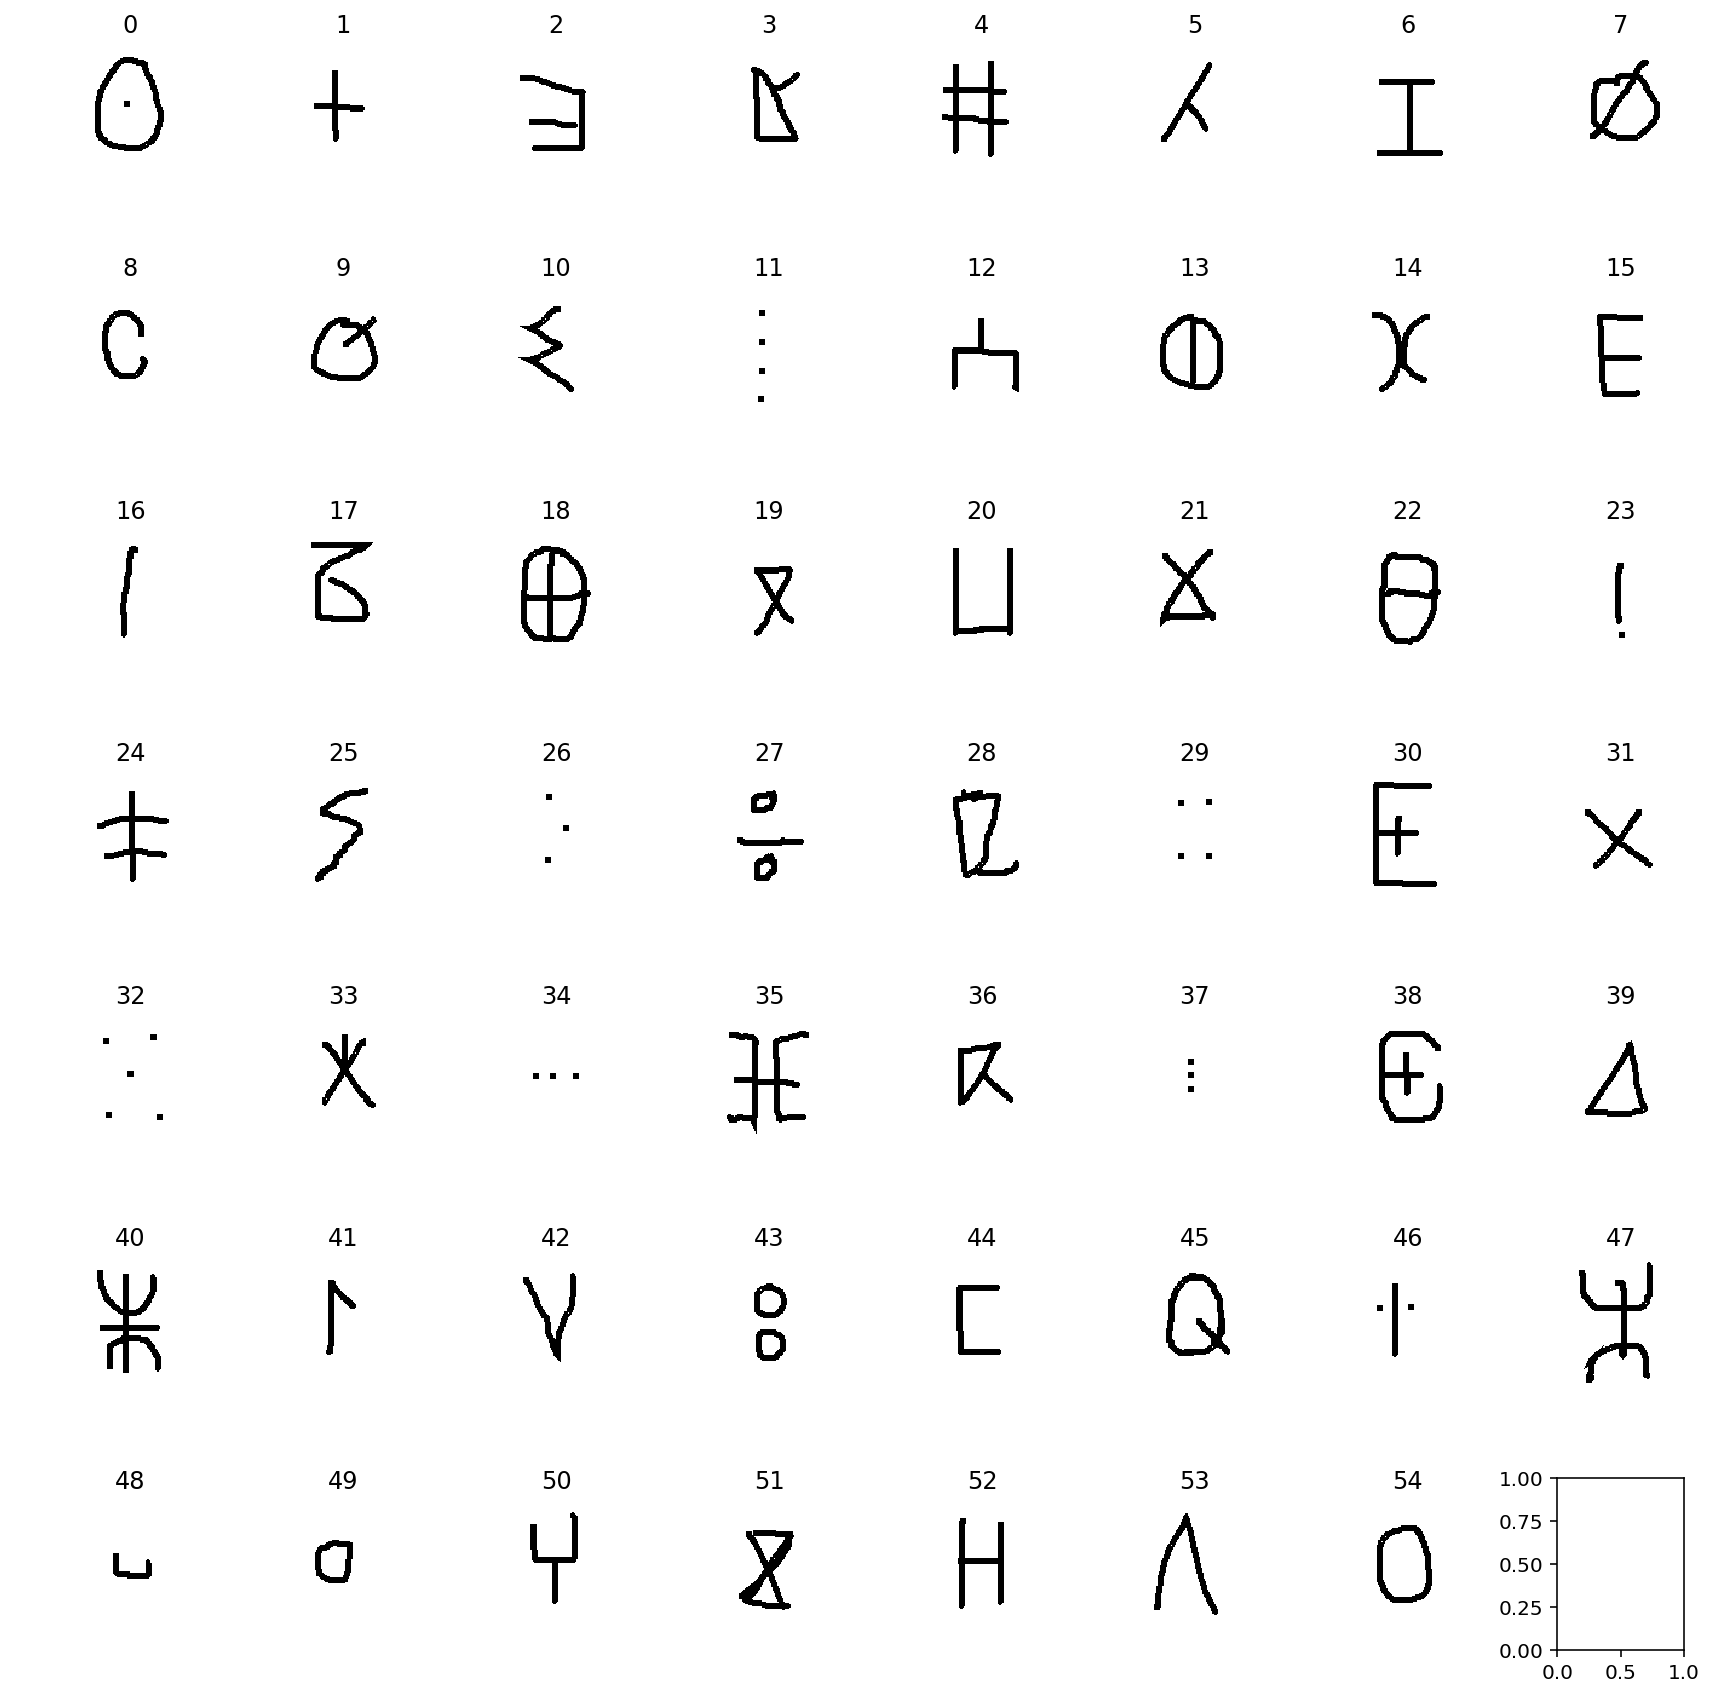

In [28]:
alphabet_overview(all_alphabets["Tifinagh"],figsize=(12,12))

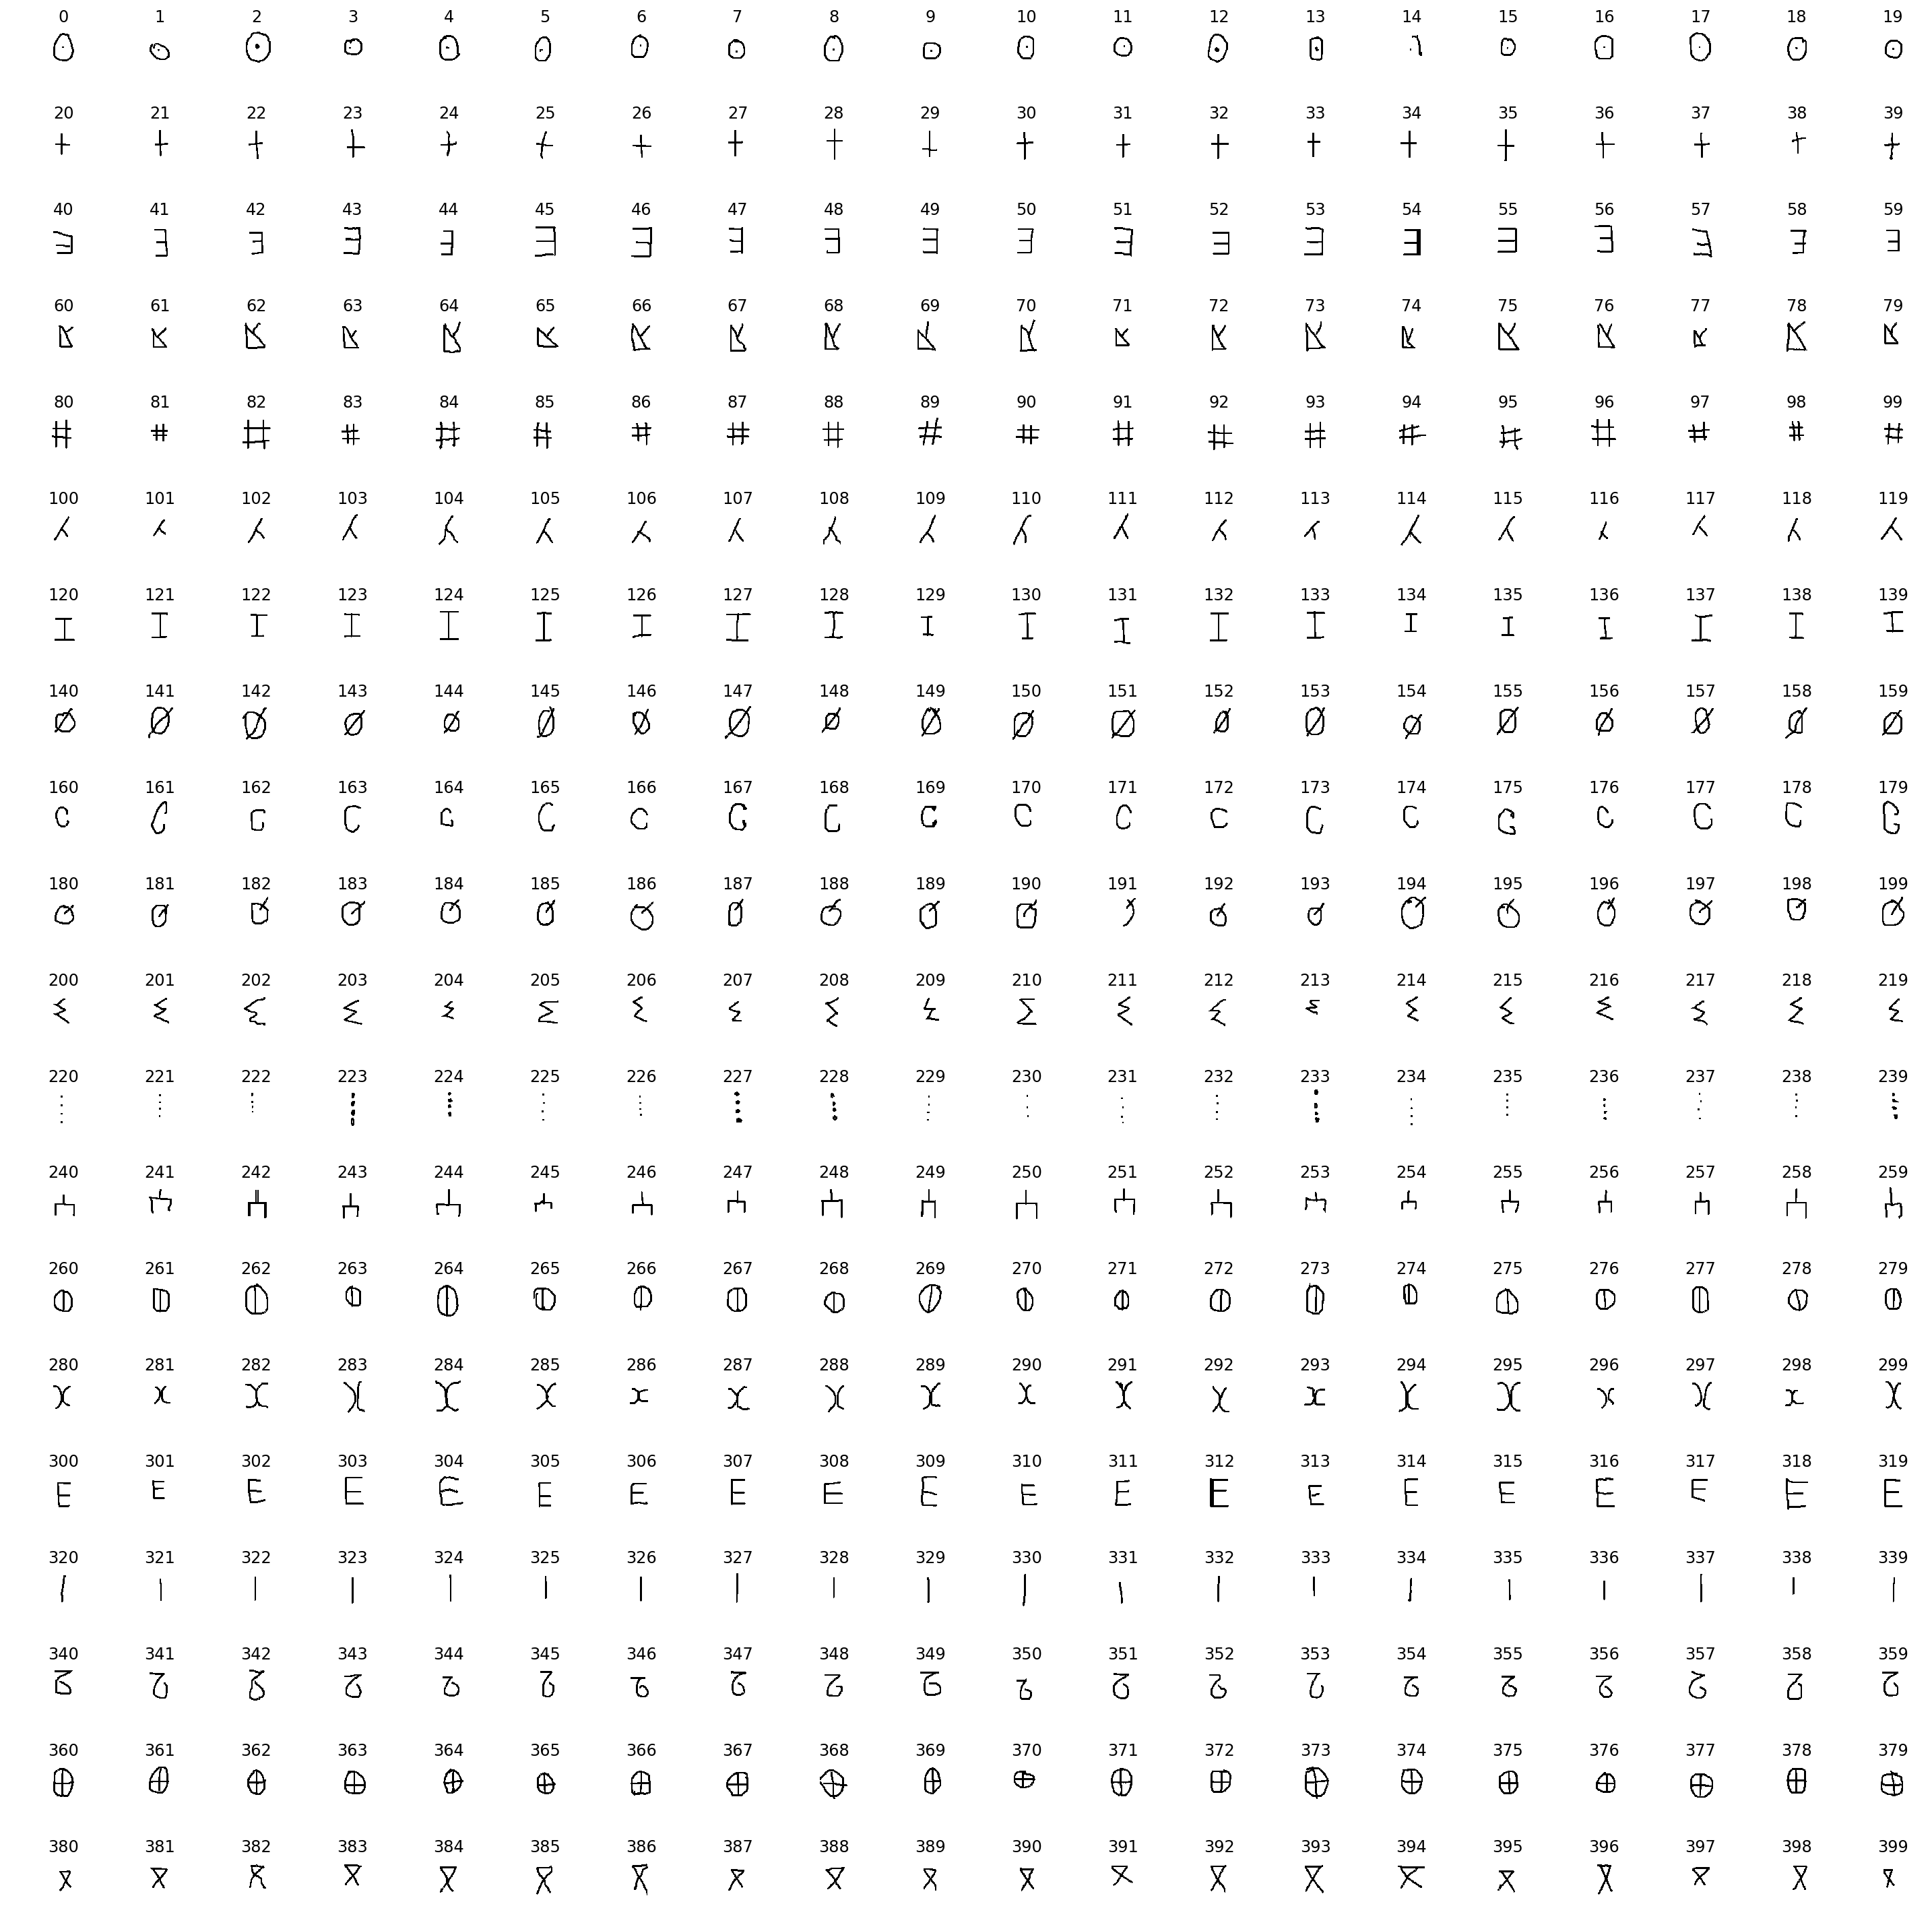

In [29]:
plot_figures(all_alphabets["Tifinagh"][:400],nrows=20,ncols=20,figsize=(20,20))